In [62]:
from transformers import pipeline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import json
import requests
from tqdm import tqdm
import config

In [2]:
df = pd.read_csv('Twitter_Data.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
classifier = pipeline('sentiment-analysis',model=r"D:\SentimentPrediction_NLP\Transformers\sentimentTranformers\bertweet-base-sentiment")

In [5]:
res = classifier(df.clean_text[1])

In [6]:
res

[{'label': 'NEG', 'score': 0.7548747658729553}]

In [19]:
classifier1 = pipeline('sentiment-analysis',model=r"D:\SentimentPrediction_NLP\Transformers\sentimentTranformers\beto-sentiment-analysis")

In [24]:
res1 = classifier1(df.clean_text[1])

In [25]:
res1

[{'label': 'NEU', 'score': 0.998062789440155}]

In [70]:
print(res1[0]['label']=='NEU')

True


In [92]:
classifier2 = pipeline('sentiment-analysis',model=r"D:\SentimentPrediction_NLP\Transformers\sentimentTranformers\twitter-roberta-base-sentiment")

In [95]:
res2 = classifier2(df.clean_text[0])

In [96]:
res2

[{'label': 'LABEL_0', 'score': 0.5099374651908875}]

## Call indv TL function and show accuracy

In [98]:
def callClasifier(classifier, df1):
    l=[]
    for i in df1.clean_text:
#         print(i)
        result = classifier(i)
#         print(result)
        if(('NEU' in result[0]['label']) or ('1'in result[0]['label'])):
            l.append(0.0)
        elif(('NEG' in result[0]['label']) or ('0'in result[0]['label'])):
            l.append(-1.0)
        else:
            l.append(1.0)
    return l

In [85]:
classiferBERT = pipeline('sentiment-analysis',model=r"D:\SentimentPrediction_NLP\Transformers\sentimentTranformers\bertweet-base-sentiment")
res =callClasifier(classiferBERT, df[:500])

In [86]:
yhat = np.array(res)
y = np.array(df.category[:500])
print(yhat.shape,y.shape)

(500,) (500,)


In [87]:
target_name=['negative','neutral','positive']
print(classification_report(y, yhat, target_names=target_name))

              precision    recall  f1-score   support

    negative       0.40      0.82      0.54       104
     neutral       0.48      0.49      0.48       187
    positive       0.57      0.26      0.36       209

    accuracy                           0.46       500
   macro avg       0.48      0.52      0.46       500
weighted avg       0.50      0.46      0.44       500



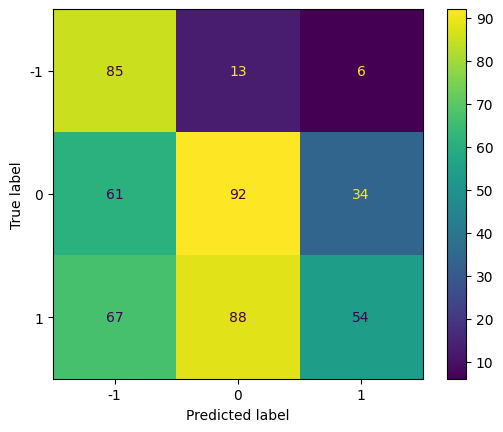

In [63]:
from sklearn.metrics import *
confusion_matrix = confusion_matrix(y, yhat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1,0, 1])
cm_display.plot()
plt.show()

In [64]:
classifierBeto = pipeline('sentiment-analysis',model=r"D:\SentimentPrediction_NLP\Transformers\sentimentTranformers\beto-sentiment-analysis")
res =callClasifier(classifierBeto, df[:500])

In [65]:
yhat = np.array(res)
y = np.array(df.category[:500])
print(yhat.shape, y.shape)

(500,) (500,)


In [66]:
target_name=['negative','neutral','positive']
print(classification_report(y, yhat, target_names=target_name))

              precision    recall  f1-score   support

    negative       0.33      0.40      0.37       104
     neutral       0.46      0.88      0.61       187
    positive       0.75      0.07      0.13       209

    accuracy                           0.44       500
   macro avg       0.52      0.45      0.37       500
weighted avg       0.56      0.44      0.36       500



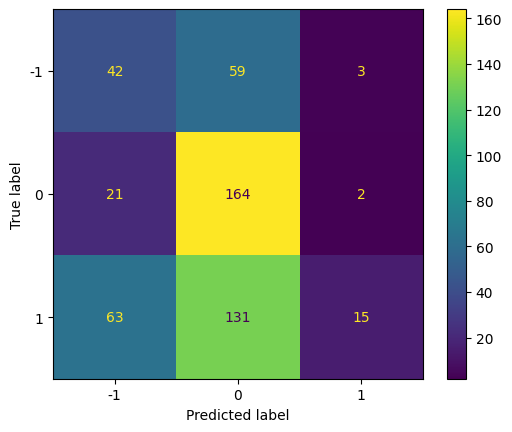

In [67]:
from sklearn.metrics import *
confusion_matrix = confusion_matrix(y, yhat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1,0, 1])
cm_display.plot()
plt.show()

In [99]:
classifierBeto = pipeline('sentiment-analysis',model=r"D:\SentimentPrediction_NLP\Transformers\sentimentTranformers\twitter-roberta-base-sentiment")
res =callClasifier(classifierBeto, df[:500])

In [100]:
yhat = np.array(res)
y = np.array(df.category[:500])
print(yhat.shape, y.shape)

(500,) (500,)


In [101]:
target_name=['negative','neutral','positive']
print(classification_report(y, yhat, target_names=target_name))

              precision    recall  f1-score   support

    negative       0.38      0.66      0.48       104
     neutral       0.45      0.61      0.52       187
    positive       0.66      0.20      0.30       209

    accuracy                           0.45       500
   macro avg       0.50      0.49      0.43       500
weighted avg       0.52      0.45      0.42       500



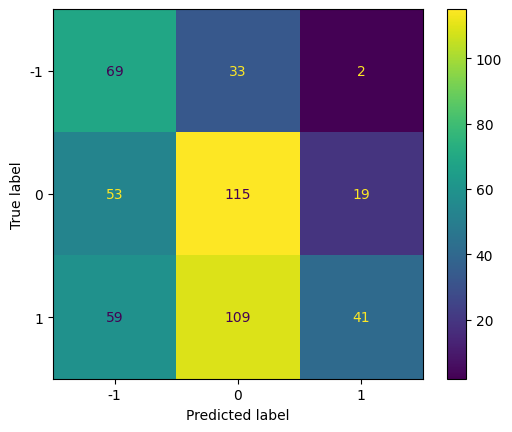

In [102]:
from sklearn.metrics import *
confusion_matrix = confusion_matrix(y, yhat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1,0, 1])
cm_display.plot()
plt.show()

## Api calling 

In [26]:
endPoints = ['ProsusAI/finbert','finiteautomata/bertweet-base-sentiment-analysis','elozano/tweet_sentiment_eval']

In [75]:
def query(payload, API_URL):
    API_TOKEN = config.apiHF
    headers = {"Authorization": f"Bearer {API_TOKEN}"}
    data = json.dumps(payload)
    response = requests.request("POST", API_URL, headers=headers, data=data)
    return json.loads(response.content.decode("utf-8"))
def predict(newDf):
    bl=[]
    for i in endPoints:
        API_URL = "https://api-inference.huggingface.co/models/"+i
        data = query({"inputs": newDf},API_URL)
        # print(data)
        l=[]
        key= [data[0][0]['label'][:3].upper(),data[0][1]['label'][:3].upper(),data[0][2]['label'][:3].upper()]
        value = [data[0][0]['score'],data[0][1]['score'],data[0][2]['score']]
        l.append(value[key.index('NEG')])
        l.append(value[key.index('NEU')])
        l.append(value[key.index('POS')])
        bl.append(l)    
    finalA = np.array(bl)
    return np.argmax(np.mean(finalA,axis=0))

In [76]:
dfnew= df[:10]
# dfnew.shape
yhat=[]
for i in tqdm(dfnew.clean_text):
    v=predict(i)
    if(v==0):
        yhat.append(-1.0)
    elif(v==1):
        yhat.append(0.0)
    else:
        yhat.append(1.0)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


In [74]:
v=predict(df.clean_text[1])
if(v==0):
    print(-1.0)
elif(v==1):
    print(0.0)
else:
    print(1.0)

-1.0


In [79]:
y_hat = np.array(yhat)
y = np.array(df.category[:10])
print(y_hat.shape, y.shape)

(10,) (10,)


In [80]:
target_name=['negative','neutral','positive']
print(classification_report(y, y_hat, target_names=target_name))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.50      0.75      0.60         4
    positive       1.00      0.40      0.57         5

    accuracy                           0.50        10
   macro avg       0.50      0.38      0.39        10
weighted avg       0.70      0.50      0.53        10



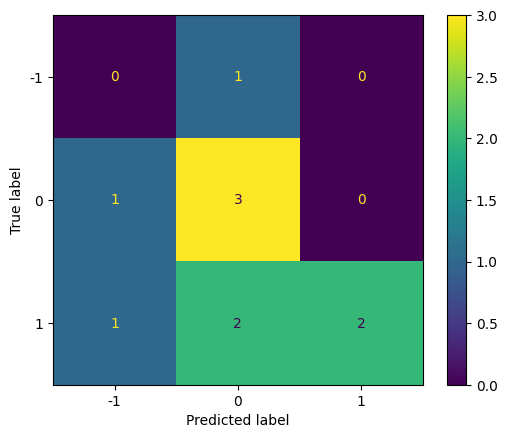

In [81]:
from sklearn.metrics import *
confusion_matrix = confusion_matrix(y, y_hat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1,0, 1])
cm_display.plot()
plt.show()